### Fashion MNIST - 3 Layer Convolution Neural Network Model using Tensorflow,Keras- Part 3



* #### The objective of this jupyter notebook is to define,compile & evaluate a 3 layer convolutional neural network(CNN) model 

* #### Visualise the validation accuracy and validation loss


### Import Libraries

In [1]:
# Import Pandas for data manipulation using dataframes
import pandas as pd

#Import Numpy for statistical calculations
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
# Create dataframes for train and test datasets

train_df = pd.read_csv('./data/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('./data/fashion-mnist_test.csv', sep = ',')

Let us explore the train and test data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.
To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [5]:
train_data = np.array(train_df, dtype = 'float32')

Similarly let us do the same process for test data

In [6]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train contains all the rows and all columns except the label column and excluding header info .
- y_train contains all the rows and first column and excluding header info .


Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_test contains all the rows and all columns except the label column and excluding header info .
- y_test contains all the rows and first column and excluding header info .

####  Important Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 

In [7]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the sample image how it looks like in 28 * 28 pixel size

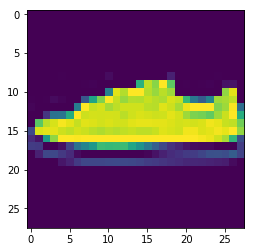

In [9]:
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can observe above the shape of shoe from the sample image

### Create the Convolutional Neural Networks (CNN)

- #### Define the model
- #### Compile the model
- #### Fit the model

First of all let us define the shape of the image before we define the model


In [10]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


Now we need to do more formating on the x_train,x_test and x_validate sets.

In [11]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


Let us now print the shape of x_train,x_test and x_validate so see how they look like

In [12]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


- #### Define the model 

In [13]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape,name = 'Conv2D-1'),
    MaxPooling2D(pool_size=2,name = 'MaxPool') ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2,name='Dropout'),
    Flatten(name='flatten'), # flatten out the layers
    Dense(32,activation='relu',name='Dense'),
    Dense(10,activation = 'softmax',name='Output')
] ,name = name)


name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape,name = 'Conv2D-1'),
    MaxPooling2D(pool_size=2,name = 'MaxPool') ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2,name='Dropout-1'),
    Conv2D(filters=64,kernel_size=3,activation='relu',name = 'Conv2D-2'),
    Dropout(0.25,name='Dropout-2'),
    Flatten(name='flatten'), # flatten out the layers
    Dense(64,activation='relu',name='Dense'),
    Dense(10,activation = 'softmax',name='Output')
] ,name = name)

name = '3_Layer'
cnn_model_3 = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape,kernel_initializer='he_normal', name = 'Conv2D-1'),
    MaxPooling2D(pool_size=2,name = 'MaxPool') ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.25,name='Dropout-1'),
    Conv2D(filters=64,kernel_size=3,activation='relu',name = 'Conv2D-2'),
    Dropout(0.25,name='Dropout-2'),
    Conv2D(filters=128,kernel_size=3,activation='relu',name = 'Conv2D-3'),
    Dropout(0.40,name='Dropout-3'),
    Flatten(name='flatten'), # flatten out the layers
    Dense(128,activation='relu',name='Dense'),
    Dropout(0.40,name='Dropout'),
    Dense(10,activation = 'softmax',name='Output')
] ,name = name)


cnn_models=[cnn_model_1,cnn_model_2,cnn_model_3]
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

As you can see above that as we increase each layer there is atleast 4 fold increase in total tunable parameters which basically improves the accuracy of the model significantly.

Now let us train the model 

- #### Compile & Fit the model

In [15]:
history_dict={}

for model in cnn_models:
    model.compile(
        loss ='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics =['accuracy']
    )
    history = model.fit(
        x_train,y_train,
        batch_size=batch_size,
        epochs=50,verbose=1,
        validation_data=(x_validate,y_validate),
    )

    history_dict[model.name]=history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 36s 747us/step - loss: 0.7659 - acc: 0.7465 - val_loss: 0.4892 - val_acc: 0.8303
Epoch 2/50
48000/48000 [==============================] - 35s 734us/step - loss: 0.4477 - acc: 0.8424 - val_loss: 0.4043 - val_acc: 0.8614
Epoch 3/50
48000/48000 [==============================] - 36s 745us/step - loss: 0.3966 - acc: 0.8610 - val_loss: 0.3764 - val_acc: 0.8699
Epoch 4/50
48000/48000 [==============================] - 36s 743us/step - loss: 0.3687 - acc: 0.8713 - val_loss: 0.3656 - val_acc: 0.8700
Epoch 5/50
48000/48000 [==============================] - 35s 738us/step - loss: 0.3538 - acc: 0.8754 - val_loss: 0.3369 - val_acc: 0.8828
Epoch 6/50
48000/48000 [==============================] - 35s 739us/step - loss: 0.3332 - acc: 0.8833 - val_loss: 0.3302 - val_acc: 0.8838
Epoch 7/50
48000/48000 [==============================] - 36s 744us/step - loss: 0.3188 - acc: 0.8882 - val_loss: 0.

InvalidArgumentError: You must feed a value for placeholder tensor 'Conv2D-1_input' with dtype float and shape [?,28,28,1]
	 [[Node: Conv2D-1_input = Placeholder[dtype=DT_FLOAT, shape=[?,28,28,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Conv2D-1_input', defined at:
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-8b3a83feff47>", line 9, in <module>
    ] ,name = name)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\models.py", line 441, in __init__
    self.add(layer)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\models.py", line 493, in add
    name=layer.name + '_input')
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\engine\topology.py", line 1457, in Input
    input_tensor=tensor)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\engine\topology.py", line 1366, in __init__
    name=self.name)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py", line 508, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "c:\users\pavan sanagapati\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Conv2D-1_input' with dtype float and shape [?,28,28,1]
	 [[Node: Conv2D-1_input = Placeholder[dtype=DT_FLOAT, shape=[?,28,28,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


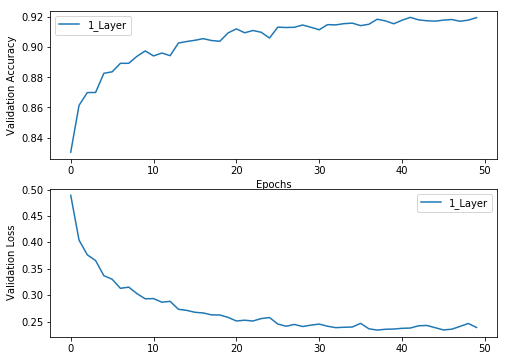

In [16]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()    

- #### Evaluate /Score the model

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))